In [2]:
#region imports
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().run_line_magic
    _magic("load_ext", "autoreload")
    _magic("autoreload", "2")
except:
    pass

# noinspection PyUnresolvedReferences
import datetime as dt
# noinspection PyUnresolvedReferences
import glob
# noinspection PyUnresolvedReferences
import os
# noinspection PyUnresolvedReferences
import pprint
# noinspection PyUnresolvedReferences
import sys
# noinspection PyUnresolvedReferences
import cartopy as crt
# noinspection PyUnresolvedReferences
import matplotlib as mpl
# noinspection PyUnresolvedReferences
import matplotlib.colors
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt
# noinspection PyUnresolvedReferences
import numpy as np
# noinspection PyUnresolvedReferences
import pandas as pd
# noinspection PyUnresolvedReferences
import seaborn as sns
# noinspection PyUnresolvedReferences
import xarray as xr
# noinspection PyUnresolvedReferences
#import bnn_tools.bnn_array

import mod.funs as fu

plt.style.use('default')
xr.set_options(
    display_expand_data = False,
    display_expand_data_vars = True,
    display_max_rows = 10,
    display_style = 'html',
    display_width = 80,
    display_expand_attrs = False
);
#endregion

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
J_ = 'j725'
J = 'j37'
d725 = xr.open_dataset(f'../../data/d1/{J_}.nc')
d37 = xr.open_dataset('../../data/d1/j37.nc')

In [4]:
N = '$N_{2.5-5\mathrm{nm}}$'
d5 = (
    xr.open_dataset('../../data/d1/ds_5.nc')
    .rename({'N':N})
)

In [5]:
d5

<xarray.Dataset>
Dimensions:                 (id: 3, Dp: 52, day: 1826, hour: 289, Dp_interval: 1)
Coordinates: (10/11)
  * Dp                      (Dp) float64 2.818e-09 3.162e-09 ... 8.913e-07 1e-06
  * id                      (id) object 'nais' 'dmps' 'nd'
  * hour                    (hour) float64 -24.0 -23.75 -23.5 ... 47.75 48.0
  * day                     (day) datetime64[ns] 2018-01-01 ... 2022-12-31
    is_day                  (hour) bool ...
    ...                      ...
    n_day                   (Dp_interval, day) int64 ...
    n_night                 (Dp_interval, day) int64 ...
    g                       (Dp_interval, day) object ...
    q                       (Dp_interval, day) float64 ...
    qCut                    (Dp_interval, day) object ...
Dimensions without coordinates: Dp_interval
Data variables:
    dndlDp                  (id, Dp, day, hour, Dp_interval) float64 ...
    $N_{2.5-5\mathrm{nm}}$  (Dp_interval, day, hour) float64 ...
    lN                      (Dp_interval, day, hour) float64 ...
    lN_s                    (Dp_interval, day, hour) float64 ...
    N_s                     (Dp_interval, day, hour) float64 ...
    max_lN                  (Dp_interval, day) float64 ...
    min_lN                  (Dp_interval, day) float64 ...
    d_lN                    (Dp_interval, day) float64 ...

In [37]:
ser = (
    xr.merge([
        d37[J]
        .rolling({'hour':5},min_periods=1).mean()
        .max('hour'),
        d725[J_]
        .rolling({'hour':5},min_periods=1).mean()
        .max('hour'),
        d5['d_lN']
    ])
    .squeeze()
    .assign({'dN':lambda d:10**d['d_lN']})
    .assign({f'l{J_}':lambda d:np.log10(d[J_])})
    .assign({'qr':lambda d:np.round((d['q']+2.5)/5)*5-2.5})
    .to_dataframe()
    .where(lambda d:d['dN']>0)
    .where(lambda d:d[J_]>0)
)

In [38]:
np.round()

TypeError: _around_dispatcher() missing 1 required positional argument: 'a'

In [85]:
ser1 =  (
    ser
    [[J,J_,'qr','q']]
    # .set_index('q')
    .rename({J_:'$7-25\mathrm{nm}$'},axis=1)
    .rename({J:'$3-7\mathrm{nm}$'},axis=1)
    .melt(['qr','q'])
    .rename({'variable':'$J$'},axis=1)
)
ser1

,qr,q,$J$,value
0,2.5,0.566394,$3-7\mathrm{nm}$,0.006237
1,72.5,70.673379,$3-7\mathrm{nm}$,0.124985
2,17.5,16.488357,$3-7\mathrm{nm}$,0.011801
3,2.5,2.580239,$3-7\mathrm{nm}$,0.008374
4,52.5,53.429830,$3-7\mathrm{nm}$,0.005418
...,...,...,...,...
3647,NaN,NaN,$7-25\mathrm{nm}$,NaN
3648,NaN,NaN,$7-25\mathrm{nm}$,NaN
3649,NaN,NaN,$7-25\mathrm{nm}$,NaN
3650,NaN,NaN,$7-25\mathrm{nm}$,NaN


0

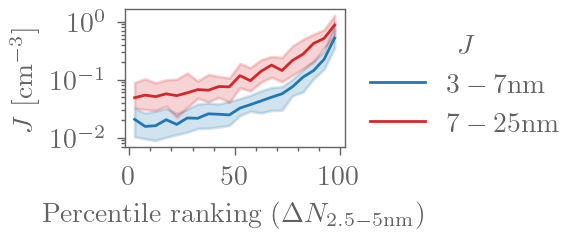

In [97]:
#region sciplot
# noinspection PyUnresolvedReferences
import scienceplots
plt.style.use([
    'default',
    'acp',
    #'notebook',
    # 'sp-grid',
    'no-black',
    'illustrator-safe'
])
#endregion sciplot

sns.lineplot(
    # kind = 'line',
    data = ser1,
    x = 'qr',
    y = 'value',
    hue = '$J$',
    estimator='median',
    errorbar=('pi', 50),
    palette = ['C0','C3']
)

# sns.scatterplot(
#     # kind = 'line',
#     data = ser1,
#     x = 'q',
#     y = 'value',
#     hue = '$J$',
#     marker='.',
#     s = 1,
#     zorder = 0,
#     legend=False,
#     ec='none',
#     alpha=.5
# )

ax:plt.Axes = plt.gca()
ax.set_yscale('log')
ax.set_ylabel('$J$ [cm$^{-3}$]')
ax.set_xlabel('Percentile ranking ($\Delta N_{2.5-5\mathrm{nm}}$)')
ax.set_box_aspect(1/1.6)
ax.set_xticks([0,50,100])
f:plt.Figure = plt.gcf()
sns.move_legend(ax,"upper left", bbox_to_anchor=(1, 1))
f.set_size_inches(3,1.5)
import uscit
uscit.set_margin(f,x1=.7,x2=1.2,y1=.5)
# uscit.set_fig_rule(f)
#region temp open fig
_p_ = 'fig050.pdf';plt.gcf().savefig(_p_,transparent=True);
os.system(f'open {_p_}')
#endregion temp open fig
